In [1]:
# Yo.

# I got sick of everyone saying "more gun restrictions" and "more guns"
# without any data behind it (myself included). Since I'm in a data sci
# course right now, figured this would be a good way to practice.

# If you haven't learned python yet, just follow the hashtags ;)

In [2]:
# Magic to make charts show and manipulate data files.
%matplotlib inline
import pandas as pd

In [3]:
# This is a dataset from motherjones.com compiling info on mass shootings.
# For more info, check the README file in this folder.
df = pd.read_csv('mj_1982-2016.csv')

In [4]:
# Grab the first 5 rows, just to see what we got.
# Data from the Florida case has been omitted as details emerge.
df.head()

,Case,Location,Date,Year,Summary,Fatalities,Wounded,Total victims,Venue,Prior signs of possible mental illness,...,Where obtained,Type of weapons,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type
0,Orlando nightclub massacre,"Orlando, Florida",6/12/2016,2016,(pending),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Excel Industries mass shooting,"Hesston, Kansas",2/25/2016,2016,"Cedric L. Ford, who worked as a painter at a m...",3.0,14.0,17.0,Workplace,Unclear,...,NaN,"Semiautomatic rifle, semiautomatic handgun",AK-47,Black,M,http://www.nytimes.com/2016/02/26/us/shooting-...,NaN,NaN,NaN,Spree
2,Kalamazoo shooting spree,"Kalamazoo County, Michigan",2/20/2016,2016,"Jason B. Dalton, a driver for Uber, apparently...",6.0,2.0,8.0,Other,Unclear,...,NaN,Semiautomatic handgun,9 mm handgun,White,M,http://www.nytimes.com/2016/02/22/us/kalamazoo...,NaN,NaN,NaN,Spree
3,San Bernardino mass shooting,"San Bernardino, California",12/2/2015,2015,Syed Rizwan Farook left a Christmas party held...,14.0,21.0,35.0,\nWorkplace,Unclear,...,The suspects purchased their handguns in the U...,Two assault rifles and two semi-automatic pist...,Two semiautomatic AR-15-style rifles—one a DPM...,Other,Male & Female,http://www.motherjones.com/mojo/2015/12/san-be...,NaN,NaN,NaN,Mass
4,Planned Parenthood clinic,"Colorado Springs, Colorado",11/27/2015,2015,"Robert Lewis Dear, 57, shot and killed a polic...",3.0,9.0,12.0,Workplace,Unclear,...,Unclear,Long gun,Possibly an AK-style semiautomatic rifle and o...,White,M,http://www.nytimes.com/2015/11/28/us/colorado-...,NaN,NaN,NaN,Mass


In [5]:
# There's a little bit of cleaning to do. For safety, we'll make a copy.
# For simplicity, location has been reduced to just state.
df2 = df.copy()
df2.Location = df2.Location.apply(lambda x: x.split(',').pop().strip())

In [6]:
# Rename location to be more informative. Let's see what's here.
df2.rename(columns={'Location':'State'}, inplace=True)
df2.head()

,Case,State,Date,Year,Summary,Fatalities,Wounded,Total victims,Venue,Prior signs of possible mental illness,...,Where obtained,Type of weapons,Weapon details,Race,Gender,Sources,Mental Health Sources,latitude,longitude,Type
0,Orlando nightclub massacre,Florida,6/12/2016,2016,(pending),NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Excel Industries mass shooting,Kansas,2/25/2016,2016,"Cedric L. Ford, who worked as a painter at a m...",3.0,14.0,17.0,Workplace,Unclear,...,NaN,"Semiautomatic rifle, semiautomatic handgun",AK-47,Black,M,http://www.nytimes.com/2016/02/26/us/shooting-...,NaN,NaN,NaN,Spree
2,Kalamazoo shooting spree,Michigan,2/20/2016,2016,"Jason B. Dalton, a driver for Uber, apparently...",6.0,2.0,8.0,Other,Unclear,...,NaN,Semiautomatic handgun,9 mm handgun,White,M,http://www.nytimes.com/2016/02/22/us/kalamazoo...,NaN,NaN,NaN,Spree
3,San Bernardino mass shooting,California,12/2/2015,2015,Syed Rizwan Farook left a Christmas party held...,14.0,21.0,35.0,\nWorkplace,Unclear,...,The suspects purchased their handguns in the U...,Two assault rifles and two semi-automatic pist...,Two semiautomatic AR-15-style rifles—one a DPM...,Other,Male & Female,http://www.motherjones.com/mojo/2015/12/san-be...,NaN,NaN,NaN,Mass
4,Planned Parenthood clinic,Colorado,11/27/2015,2015,"Robert Lewis Dear, 57, shot and killed a polic...",3.0,9.0,12.0,Workplace,Unclear,...,Unclear,Long gun,Possibly an AK-style semiautomatic rifle and o...,White,M,http://www.nytimes.com/2015/11/28/us/colorado-...,NaN,NaN,NaN,Mass


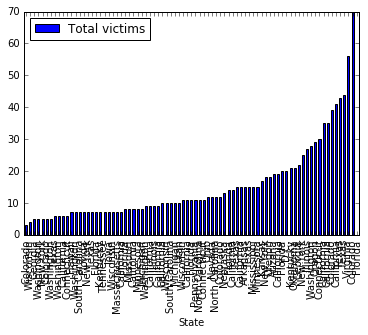

In [7]:
# Let's index by date & see what that looks like.
##todo: overlay this with an intensity scale on a map of the united states.
df2 = df2.set_index(pd.DatetimeIndex(df2['Date']))
df2.sort_values('Total victims').plot(x='State', y='Total victims', kind='bar', stacked=True)

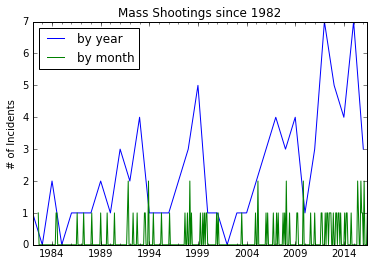

In [23]:
# Besides the huge spike before 2000, there's a much lower number of victims.
# Let's look at number of incidents over time.
incidents_per_year = df2.groupby(pd.TimeGrouper('AS'))['Case'].count()
incidents_per_year.plot(kind='line', legend=True, label='by year')

incidents_per_month = df2.groupby(pd.TimeGrouper('M'))['Case'].count()
incidents_per_month.plot(kind='line', title="Mass Shootings since 1982", legend=True, label='by month').set_ylabel('# of Incidents')

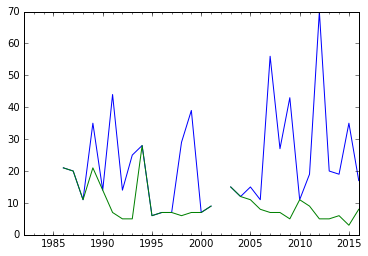

In [32]:
# Could there be a trend with the size of events also?
df2.groupby(pd.TimeGrouper('AS'))['Total victims'].max().plot(kind='line')
df2.groupby(pd.TimeGrouper('AS'))['Total victims'].min().plot(kind='line')

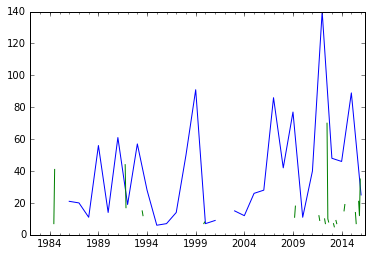

In [9]:
# There seems to be a lower frequency of incidents over the '94 AR ban.
# Let's examine total number of 
df2.groupby(pd.TimeGrouper('AS'))['Total victims'].sum().plot(kind='line')
df2.groupby(pd.TimeGrouper('M'))['Total victims'].sum().plot(kind='line')

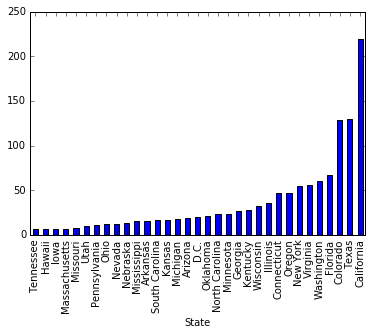

In [10]:
# It looks more cyclical, and heavier on the recent side, but no clues.
# Note that only '83, '85, and '02 had no "public mass shootings".
# What's the distribution by state?
df2.groupby('State')['Total victims'].sum().sort_values().plot(kind='bar')

In [11]:
# Interesting, it appears to mirror the population distribution.
# To check, I'll bring in some government data.
# It's dirty too, so there's some minor cleaning to do.
import numpy as np
pop = pd.read_csv('govt_pop.csv', 
                  skiprows=[0,1,2,3,4,5,6,7,8,60,61,62,63,64,65,66,67,68], 
                  names=['State', 'census_offcl', 'census_est', '2010_est', '2011_est', '2012_est', '2013_est', '2014_est', '2015_est' ])

pop.State = pop.State.apply(lambda x: x.split('.').pop())
pop.census_offcl = pop.census_offcl.apply(lambda x: int(x.replace(',','')))
pop.census_est = pop.census_est.apply(lambda x: int(x.replace(',','')))
pop['2010_est'] = pop['2010_est'].apply(lambda x: int(x.replace(',','')))
pop['2011_est'] = pop['2011_est'].apply(lambda x: int(x.replace(',','')))
pop['2012_est'] = pop['2012_est'].apply(lambda x: int(x.replace(',','')))
pop['2013_est'] = pop['2013_est'].apply(lambda x: int(x.replace(',','')))
pop['2014_est'] = pop['2014_est'].apply(lambda x: int(x.replace(',','')))
pop['2015_est'] = pop['2015_est'].apply(lambda x: int(x.replace(',','')))
pop

,State,census_offcl,census_est,2010_est,2011_est,2012_est,2013_est,2014_est,2015_est
0,Alabama,4779736,4780127,4785161,4801108,4816089,4830533,4846411,4858979
1,Alaska,710231,710249,714021,722720,731228,737442,737046,738432
2,Arizona,6392017,6392307,6408208,6468732,6553262,6630799,6728783,6828065
3,Arkansas,2915918,2915958,2922394,2938538,2949499,2957957,2966835,2978204
4,California,37253956,37254503,37334079,37700034,38056055,38414128,38792291,39144818
5,Colorado,5029196,5029324,5048254,5119480,5191731,5271132,5355588,5456574
6,Connecticut,3574097,3574118,3579717,3589759,3593541,3597168,3594762,3590886
7,Delaware,897934,897936,899791,907916,917099,925353,935968,945934
8,District of Columbia,601723,601767,605126,620472,635342,649540,659836,672228
9,Florida,18801310,18804623,18849890,19105533,19352021,19594467,19905569,20271272


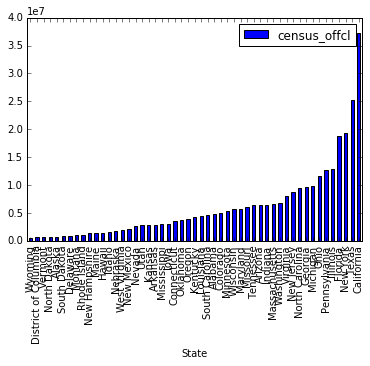

In [12]:
# Now, let's see what the population distribution looked like in 2010.
pop.sort_values('census_offcl').plot(x='State', y='census_offcl', kind='bar')

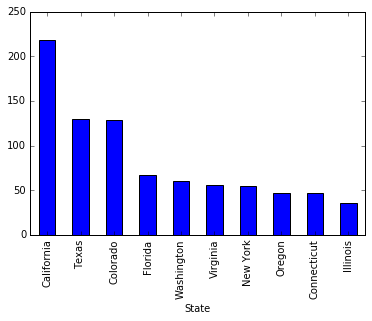

In [13]:
# A little hard to read. Let's try something different.
df2.groupby('State')['Total victims'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

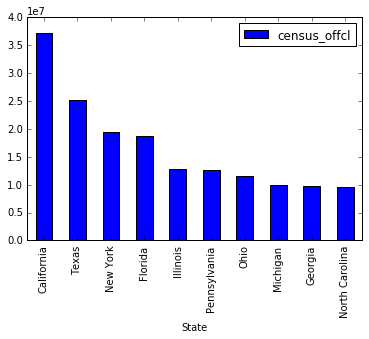

In [14]:
pop[['State', 'census_offcl']].sort_values('census_offcl', ascending=False).head(10).plot(x='State',kind='bar')

In [15]:
# Interesting, so the 5 most populous states are also in the top 10 most victims.
# Let's considate these into a single table.
df3 = pop[['State', 'census_offcl']].copy().set_index('State')
g3 = df2.groupby('State').sum().sort_index()
cs = pd.concat([df3, g3], axis=1)
cs.sort_values('Total victims', ascending=False)

,census_offcl,Year,Fatalities,Wounded,Total victims,latitude,longitude
California,37253956.0,26028.0,106.0,113.0,219.0,400.001536,-1321.473981
Texas,25145561.0,11992.0,60.0,70.0,130.0,155.615465,-487.187443
Colorado,5029196.0,10034.0,37.0,92.0,129.0,119.066102,-314.647084
Florida,18801310.0,13983.0,42.0,25.0,67.0,164.098942,-485.418589
Washington,6724540.0,12048.0,32.0,28.0,60.0,285.365008,-729.248237
Virginia,8001024.0,2007.0,33.0,23.0,56.0,37.229573,-80.413939
New York,19378102.0,8007.0,30.0,25.0,55.0,168.252111,-301.407738
Connecticut,3574097.0,6020.0,42.0,5.0,47.0,124.873887,-218.562737
Oregon,3831074.0,4013.0,13.0,34.0,47.0,44.046236,-123.022029
Illinois,12830632.0,4009.0,11.0,25.0,36.0,83.830060,-176.607092


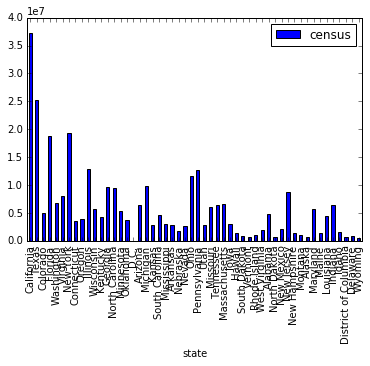

In [16]:
# Skews upward with population; that may be due to higher number of possible victims.
cs2 = cs[['census_offcl', 'Total victims']].fillna(0).reset_index().copy()
cs2.columns = ['state', 'census', 'victims']
cs2.sort_values('victims', ascending=False).plot.bar(stacked=True, x='state', y='census')

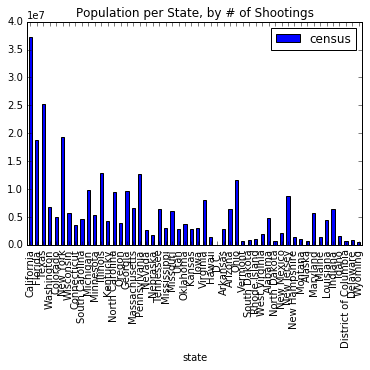

In [21]:
# After going back to compare population to number of events, it seems fairly similar.
g4 = df2.groupby('State').count().sort_index()
cs3 = pd.concat([df3, g4], axis=1)
cs4 = cs3[['census_offcl', 'Case']].fillna(0).reset_index().copy()
cs4.columns = ['state', 'census', 'shootings']
cs4.sort_values('shootings', ascending=False).plot.bar(stacked=True, x='state', y='census', title='Population per State, by # of Shootings')

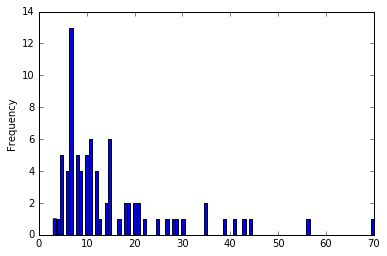

In [18]:
# This is the distribution of total victims. 
# It's skewed very low; most have between 5-15 victims.
df2['Total victims'].plot.hist(bins=100)

In [19]:
# Trying to identify outliers here. Another copy for safekeeping.
df4 = df2[['Case', 'State', 'Date', 'Year', 'Total victims']]
df4.sort_values(by='Total victims', ascending=False).head()

,Case,State,Date,Year,Total victims
2012-07-20,Aurora theater shooting,Colorado,7/20/2012,2012,70.0
2007-04-16,Virginia Tech massacre,Virginia,4/16/2007,2007,56.0
1991-10-16,Luby's massacre,Texas,10/16/1991,1991,44.0
2009-11-05,Fort Hood massacre,Texas,11/5/2009,2009,43.0
1984-07-18,San Ysidro McDonald's massacre,California,7/18/1984,1984,41.0
